### Hanya Backpropagation Neural Network
Di sini akan diuji pengolahan dan prediksi data dengan menggunakan Backpropagation nerual network sebelum dilakukan pengujian lagi dengan pengoptimalam Artificial bee colony sebagai perbandingan.

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as pt
import matplotlib.animation as animation
import math 
import random
from tqdm import tqdm
%matplotlib inline

In [22]:
class Backprop:

    def __init__ (self, numInput, numHidden, numOutput, lr = None, activation = None):
        self.numInput = numInput
        self.numHidden = numHidden
        self.numOutput = numOutput

        self.weights_ih = np.random.rand(self.numInput, self.numHidden)
        self.weights_ho = np.random.rand(self.numHidden, self.numOutput)

        self.error_data = []
        self.target_data = []
        self.data_output = []

        self.bias_h = np.random.rand(1, self.numHidden)
        self.bias_o = np.random.rand(1, self.numOutput)

        if lr is not None:
            self.learning_rate = lr
        else:
            self.learning_rate = 0.1

        if activation is not None:
            self.activation = activation
        else:
            self.activation = 'sigmoid'

    def process(self, inputs):
        inputs = np.array(inputs)
        hidden = np.dot(inputs, self.weights_ih)
        hidden = hidden + self.bias_h

        # Aktivasi
        hidden = self.mapsigmoid(hidden)

        output = np.dot(hidden, self.weights_ho)
        output = output + self.bias_o
        output = self.mapsigmoid(output)

        return output

    def set_weight(self, ih = None, ho = None):
        if ih is not None:
            self.weights_ih = ih
        if ho is not None:
            self.weights_ho = ho

    def sigmoid(self, x):
        return 1 / (1 + pow(math.e, -x))

    def dsigmoid(self, x):
        return x * (1 - x)

    def mapsigmoid(self, data):
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                value = data[i, j]
                data[i, j] = self.sigmoid(value)
        return data

    def mapdsigmoid(self, data):
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                value = data[i, j]
                data[i, j] = self.dsigmoid(value)
        return data
    
    def traindata(self, inputs, targets):
        inputs = np.array(inputs)
        hidden = np.dot(inputs, self.weights_ih)
        hidden = hidden + self.bias_h

        # Aktivasi
        hidden = self.mapsigmoid(hidden)

        output = np.dot(hidden, self.weights_ho)
        output = output + self.bias_o
        outputs = self.mapsigmoid(output)

        self.data_output.append(outputs)

        targets = np.array(targets)
        output_errors = np.subtract(targets, outputs)

        self.generate_error_data(output_errors, targets)

        gradients = self.mapdsigmoid(outputs)
        gradients = np.multiply(output_errors, gradients)
        # gradients = np.dot(output_errors, gradients)
        gradients = gradients * self.learning_rate

        hidden_t = hidden.T
        weight_ho_d = np.dot(hidden_t, gradients)

        self.weights_ho = np.add(self.weights_ho, weight_ho_d)
        self.bias_o = np.add(self.bias_o, gradients)

        who_t = self.weights_ho.T
        hidden_errors = np.dot(output_errors, who_t)

        hidden_gradients = self.mapdsigmoid(hidden)
        hidden_gradients = np.multiply(hidden_errors, hidden_gradients)
        # hidden_gradients = np.dot(hidden_errors, hidden_gradients)
        hidden_gradients = hidden_gradients * self.learning_rate

        inputs_t = inputs.T
        weight_ih_d = np.dot(inputs_t, hidden_gradients)

        self.weights_ih = np.add(self.weights_ih, weight_ih_d)
        self.bias_h = np.add(self.bias_h, hidden_gradients)

    def generate_error_data(self, error, target):
        self.error_data.append(error)
        self.target_data.append(target)

    def traindatadebug(self, inputs, targets):
        inputs = np.array(inputs)

        print('\nData Input')
        print(inputs)

        hidden = np.dot(inputs, self.weights_ih)
        hidden = hidden + self.bias_h

        # Aktivasi
        hidden = self.mapsigmoid(hidden)

        print('\nData Hidden')
        print(hidden)

        output = np.dot(hidden, self.weights_ho)
        output = output + self.bias_o
        outputs = self.mapsigmoid(output)

        print('\nData Output')
        print(outputs)

        targets = np.array(targets)

        print('\nData Target')
        print(targets)

        output_errors = np.subtract(targets, outputs)

        print('\nData Output Error')
        print(output_errors)

        gradients = self.mapdsigmoid(outputs)
        gradients = np.multiply(output_errors, gradients)
        gradients = gradients * self.learning_rate

        print('\nData Gradient output')
        print(gradients)

        hidden_t = hidden.T
        weight_ho_d = np.dot(hidden_t, gradients)

        print('\nData Delta Bobot output')
        print(weight_ho_d)

        self.weights_ho = np.add(self.weights_ho, weight_ho_d)
        self.bias_o = np.add(self.bias_o, gradients)

        who_t = self.weights_ho.T
        hidden_errors = np.dot(output_errors, who_t)

        hidden_gradients = self.mapdsigmoid(hidden)
        hidden_gradients = np.multiply(hidden_errors, hidden_gradients)
        hidden_gradients = hidden_gradients * self.learning_rate

        print('\nData Hidden Gradien')
        print(hidden_gradients)

        inputs_t = inputs.T
        weight_ih_d = np.dot(inputs_t, hidden_gradients)

        print('\nData Delta Bobot hidden')
        print(weight_ih_d)

        self.weights_ih = np.add(self.weights_ih, weight_ih_d)
        self.bias_h = np.add(self.bias_h, hidden_gradients)

    def do_mse(self, root = False):
        sum_error = 0
        total = len(self.error_data)

        for i in range(total):
            self.error_data[i][0][0]**2
            sum_error += self.error_data[i][0][0]

        res = sum_error / total

        if root:
            return math.sqrt(abs(res))    
        else:
            return res

    def do_mape(self):
        sum_mape = 0
        total = len(self.target_data)
        for i in range(total):
            sum_mape += (abs(self.target_data[i][0] - self.data_output[i][0][0])) / self.target_data[i][0]
        return sum_mape / total  

    def get_weight_ih(self):
        return self.weights_ih

    def get_weight_ho(self):
        return self.weights_ho

    def get_bias_h(self):
        return self.bias_h

    def get_bias_o(self):
        return self.bias_o

    def get_errors(self):
        return np.array(self.error_data)

    def get_targets(self):
        return np.array(self.target_data)
    
    def get_outputs_data(self):
        return np.array(self.data_output)

In [23]:
dataset = pd.read_csv('dataset/normalized_clean_PM_Dongsi.csv', header=None, nrows=1400, skiprows=1)
data_training = []

# PM Dongsi
for index, rows in dataset.iterrows():
    pre = [rows[10], rows[11], rows[12], rows[13], rows[14], rows[15], rows[16], rows[17]]
    tar = [rows[6]]
    data_training.append([pre, tar])

In [24]:
dataset_testing = pd.read_csv('dataset/normalized_clean_PM_Dongsi.csv', header=None, skiprows=1400, nrows=600)
data_testing = []

for index, rows in dataset_testing.iterrows():
    pre = [rows[10], rows[11], rows[12], rows[13], rows[14], rows[15], rows[16], rows[17]]
    tar = [rows[6]]
    data_testing.append([pre, tar])

In [25]:
hiddenNueron = 10
epoch = 150
filename = "Result_hidden_" + str(hiddenNueron) + "_epoh_" + str(epoch) + '.csv'

Backpropagation = []

Backpropagation.append(Backprop(8, hiddenNueron, 1, 0.1))
Backpropagation.append(Backprop(8, hiddenNueron, 1, 0.2))
Backpropagation.append(Backprop(8, hiddenNueron, 1, 0.3))
Backpropagation.append(Backprop(8, hiddenNueron, 1, 0.4))
Backpropagation.append(Backprop(8, hiddenNueron, 1, 0.5))
Backpropagation.append(Backprop(8, hiddenNueron, 1, 0.6))
Backpropagation.append(Backprop(8, hiddenNueron, 1, 0.7))
Backpropagation.append(Backprop(8, hiddenNueron, 1, 0.8))
Backpropagation.append(Backprop(8, hiddenNueron, 1, 0.9))
Backpropagation.append(Backprop(8, hiddenNueron, 1, 1))

In [26]:
for k in range(10):
    for i in tqdm(range(epoch), desc='Loading Bos...'):
        random.shuffle(data_training)
        for j in range(len(data_training)):
            train = data_training[j][0]
            target = data_training[j][1]
            Backpropagation[k].traindata([train], target)

Loading Bos...: 100%|██████████| 150/150 [00:28<00:00,  5.23it/s]


In [27]:
data_result      = []
temp_data_result = []

for j in range(10):
    temp_data_result = []
    for i in tqdm(range(len(data_testing)), desc='Loading Bos...'):
        test = data_testing[i][0]
        target = data_testing[i][1]
    
        result    = Backpropagation[j].process([test])
        error_val = abs(target - result)
        error_per = (error_val / target)
        akurasi   = (1 - error_per)

        temp_data_result.append([result, target, error_val, error_per, akurasi])
    data_result.append(temp_data_result)

    # resultPelatihan = np.array(temp_data_result)
    # resultPelatihan = pd.DataFrame(resultPelatihan, columns=['Result', 'Target', 'Delta Error', 'Error', 'Akurasi'])
    # resultPelatihan.to_csv('Hasil/Pelatihan_' + j + '_' + filename)


Loading Bos...: 100%|██████████| 600/600 [00:00<00:00, 4109.89it/s]


### Hitung rata-rata MSE nya
Di bawah ini adalah fungsi untuk menghitung rata-rata MSE nya

In [28]:
total_data = []
for i in range(10):
    total_data.append(len(data_result[i]))

res_data             = []
actual_mse_recap     = []
actual_akurasi_recap = []
result               = []
lr_used              = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for j in range(10):
    sum_mse = 0
    sum_akurasi = 0

    for mse in range(total_data[j]):
        sum_mse += data_result[j][mse][2]**2
        sum_akurasi += data_result[j][mse][4]

    actual_mse     = sum_mse / total_data[j]
    actual_akurasi = 1 - actual_mse
    actual_mse_recap.append(actual_mse[0][0])
    actual_akurasi_recap.append(actual_akurasi[0][0])

    print('MSE Backpro ke-', j , ' = ' , actual_mse[0][0])
    print('Akurasi Backpro ke-', j, ' = ', actual_akurasi[0][0])
    result.append([lr_used[j], actual_mse[0][0], actual_akurasi[0][0], round(actual_akurasi[0][0] * 100, 3), round(actual_mse[0][0] * 100, 3)])
result = np.array(result)
result = pd.DataFrame(result, columns=['LR', 'MSE', 'Akurasi', 'Persen Akurasi', 'Persen MSE'])
result.to_csv('Hasil/' + filename)

MSE Backpro ke- 0  =  0.019007438561255398
Akurasi Backpro ke- 0  =  0.9809925614387446
MSE Backpro ke- 1  =  0.01581077045182081
Akurasi Backpro ke- 1  =  0.9841892295481792
MSE Backpro ke- 2  =  0.013325939991138912
Akurasi Backpro ke- 2  =  0.986674060008861
MSE Backpro ke- 3  =  0.008011141105591535
Akurasi Backpro ke- 3  =  0.9919888588944085
MSE Backpro ke- 4  =  0.01841890135926108
Akurasi Backpro ke- 4  =  0.981581098640739
MSE Backpro ke- 5  =  0.017603569149756398
Akurasi Backpro ke- 5  =  0.9823964308502436
MSE Backpro ke- 6  =  0.01536996220462696
Akurasi Backpro ke- 6  =  0.9846300377953731
MSE Backpro ke- 7  =  0.020591418565596608
Akurasi Backpro ke- 7  =  0.9794085814344033
MSE Backpro ke- 8  =  0.012227276472875767
Akurasi Backpro ke- 8  =  0.9877727235271242
MSE Backpro ke- 9  =  0.012140058576936568
Akurasi Backpro ke- 9  =  0.9878599414230634


### Grafik Error
Di bawah ini adalah grafik error yang dihasilkan berdasarkan learning rate yang digunakan

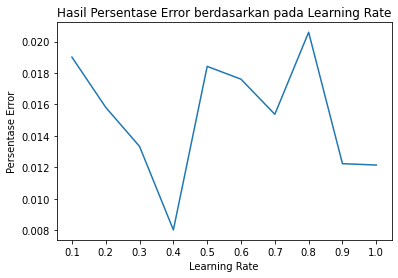

In [29]:
lr_used = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

pt.xticks(lr_used)
pt.plot(lr_used, actual_mse_recap)
pt.title('Hasil Persentase Error berdasarkan pada Learning Rate')
pt.xlabel('Learning Rate')
pt.ylabel('Persentase Error')
pt.show()

### Grafik Akurasi
Di bawah ini adalah grafik akurasi yang dihasilkan berdasarkan learning rate yang digunakan

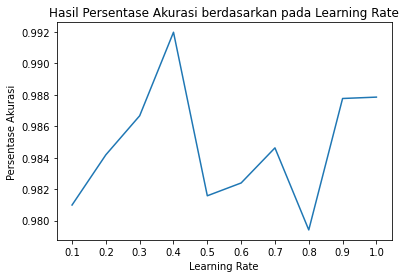

In [30]:
lr_used = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

pt.xticks(lr_used)
pt.plot(lr_used, actual_akurasi_recap)
pt.title('Hasil Persentase Akurasi berdasarkan pada Learning Rate')
pt.xlabel('Learning Rate')
pt.ylabel('Persentase Akurasi')
pt.show()